In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F


%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
t = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1+ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [27]:
chars = ['.'] + sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
# stoi['.'] = 0
itos = {i:s for s, i in stoi.items()} # could use enum(chars) but <.> will be missed

bichars = [x+y for x in chars for y in chars]
btoi = {b:i for i, b in enumerate(bichars)}
itob = {i:b for b, i in btoi.items()}

In [28]:
N = torch.zeros((729, 27), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = btoi[ch1+ch2]
        ix2 = stoi[ch3]
        N[ix1, ix2] += 1

In [37]:
N[:1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]], dtype=torch.int32)

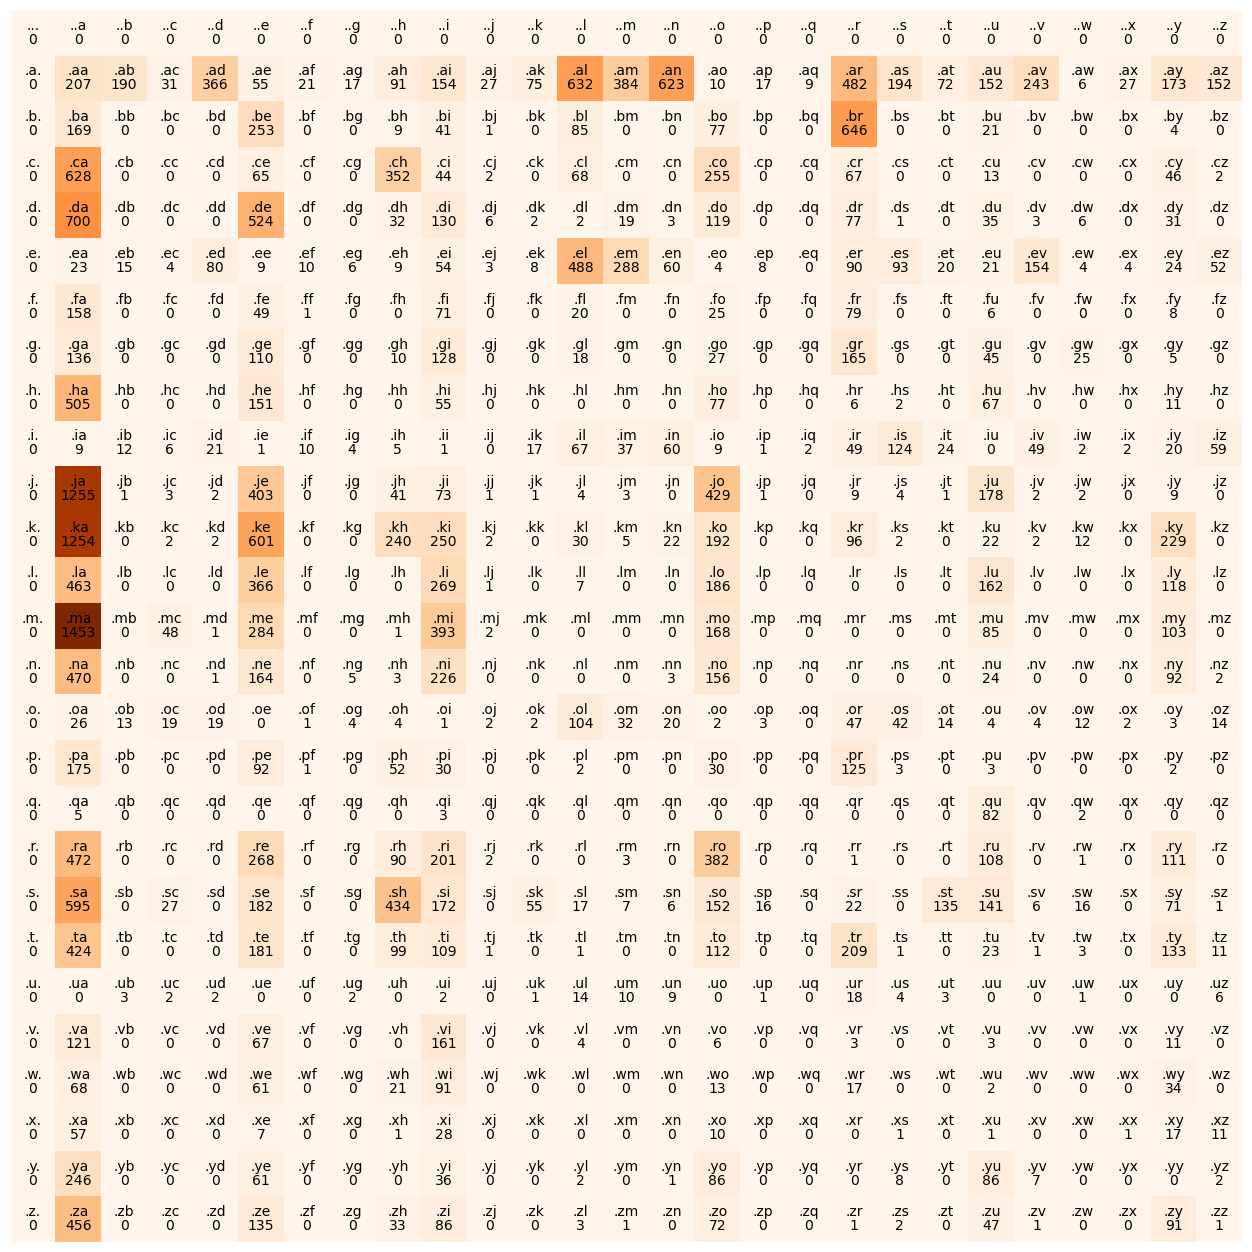

In [38]:
plt.figure(figsize=(16, 16))
plt.imshow(N[:27], cmap='Oranges')
for i in range(27):
    for j in range(27):
        chstr = itob[i]+itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
plt.axis('off');

In [48]:
za = 0
for w in words:
    za+=1 if w[:2] == 'za' else 0
za

456